In [46]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [47]:
df= pd.read_csv('Data/stud.csv')

In [48]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [49]:
X= df.drop('math_score', axis=1)
y= df['math_score']

In [50]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [51]:
#create column transformer
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor= ColumnTransformer(
    [
        ("OneHotEncoder", OneHotEncoder(), cat_features),
        ("StandardScaler", StandardScaler(), num_features)
    ]
)

In [52]:
X=  preprocessor.fit_transform(X)

In [53]:
# seperate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [54]:
#dunction to evaluate model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [55]:
models={
    "linear regression": LinearRegression(),
    "ridge regression": Ridge(),    
    "lasso regression": Lasso(),
    "KNN Regressor": KNeighborsRegressor(),
    "decision tree": DecisionTreeRegressor(),
    "random forest": RandomForestRegressor(),   
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list= []
r2_list= []

In [56]:
for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train, y_train)

    #make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #evaluate train and test datset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


linear regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


ridge regression
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


lasso regression
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


KNN Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
---------

In [57]:
#best r2 square corersponding model
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by='R2_Score', ascending=False)

,Model Name,R2_Score
1,ridge regression,0.880593
0,linear regression,0.880433
5,random forest,0.852536
7,CatBoostRegressor,0.851632
8,AdaBoost Regressor,0.845854
6,XGBRegressor,0.827797
2,lasso regression,0.825320
3,KNN Regressor,0.783813
4,decision tree,0.751067


In [58]:
lin_model= LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train, y_train)
y_pred= lin_model.predict(X_test)
score= r2_score(y_test, y_pred)*100
print(f'R2 Score of Linear Regression Model: {score:.2f}%')

R2 Score of Linear Regression Model: 88.04%


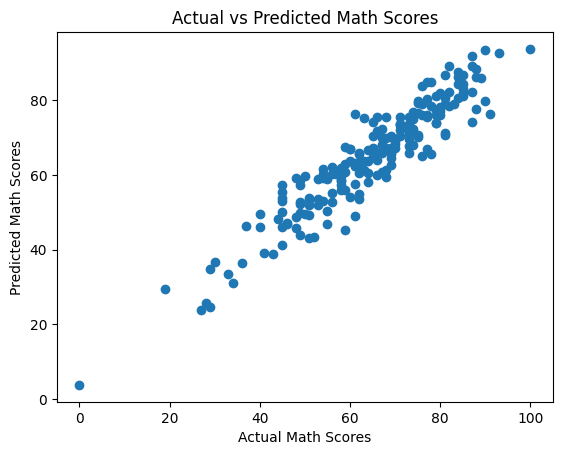

<Axes: xlabel='math_score'>

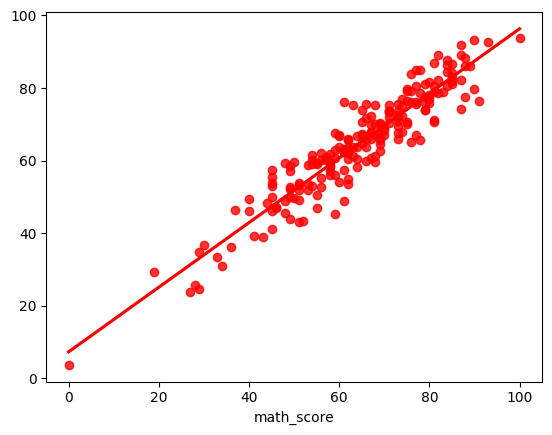

In [60]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Math Scores')
plt.ylabel('Predicted Math Scores')
plt.title('Actual vs Predicted Math Scores')
plt.show()
sns.regplot(x=y_test, y=y_pred, ci=None, color ='red')


In [61]:
diff= pd.DataFrame({'Actual value' : y_test, 'predicted_value': y_pred, 'diff' : y_test - y_pred})
diff

,Actual value,predicted_value,diff
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
